In [1]:
"""
Last Updated: 27/10/2021
------------------------

The purpose of this notebook is to get a idea of how the translation of the smiles to 
the coarse-grained beads of Martini can work. 

-> https://cedric.bouysset.net/blog/2020/08/07/rdkit-interoperability

-> https://stackoverflow.com/questions/47319238/python-plot-3d-vectors


"""

'\nLast Updated: 27/10/2021\n------------------------\n\nThe purpose of this notebook is to get a idea of how the translation of the smiles to \nthe coarse-grained beads of Martini can work. \n\n-> https://cedric.bouysset.net/blog/2020/08/07/rdkit-interoperability\n\n-> https://stackoverflow.com/questions/47319238/python-plot-3d-vectors\n\n\n'

In [2]:
!pip install plotly

/home/synoh/.local/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/synoh/.local/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import MDAnalysis as mda
from rdkit import Chem
import plotly.graph_objs as go


In [4]:
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [5]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [6]:
"""
Converting an RDkit to MDAnalysis

Parse an Rdkit molecule and build an MDAnalysis Universe from it .

"""

'\nConverting an RDkit to MDAnalysis\n\nParse an Rdkit molecule and build an MDAnalysis Universe from it .\n\n'

In [18]:
!pip install vtk

     |████████████████████████████████| 59.5 MB 36 kB/s  eta 0:00:01     |████████████████▏               | 30.0 MB 4.3 MB/s eta 0:00:07     |██████████████████████          | 40.7 MB 4.0 MB/s eta 0:00:05     |████████████████████████▋       | 45.7 MB 1.8 MB/s eta 0:00:08
     |████████████████████████████████| 495 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 51 kB/s  eta 0:00:01
     |████████████████████████████████| 74 kB 69 kB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 57 kB/s  eta 0:00:01     |███████████████████████▏        | 962 kB 953 kB/s eta 0:00:01
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
     |████████████████████████████████| 271 kB 644 kB/s eta 0:00:01
     |████████████████████████████████| 160 kB 1.1 MB/s eta 0:00:01
  Attempting uninstall: hyperlink
    Found existing installation: hyperlink 20.0.1
    Uninstalling hyperlink-20.0.1:
      Successfully uninstalled hyperlink-20.0.1
  Attempting uninstall: c

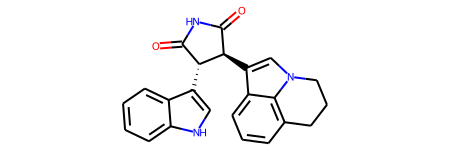

In [7]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol


In [8]:
# Converting the smiles to a MDAnalyis 

u1 = mda.Universe.from_smiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
#mol1 = u1.atoms.convert_to("RDKIT")
#u2 = mda.Universe(mol1)
u1.atoms.write("mol.pdb")

/home/synoh/miniconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/synoh/miniconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/synoh/miniconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'resnames' Using default value of 'UNK'
  "".format(attrname, default))
/home/synoh/miniconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/synoh/miniconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  "".format

In [9]:
u1.select_atoms("aromatic")  # Aromatic

<AtomGroup with 18 atoms>

In [10]:
u1.select_atoms("not aromatic") # Non-aromatic 

<AtomGroup with 29 atoms>

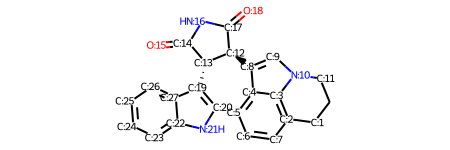

In [11]:
mol_with_atom_index(mol)


In [12]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")

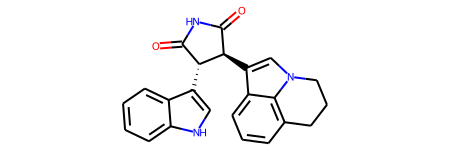

In [13]:
mol

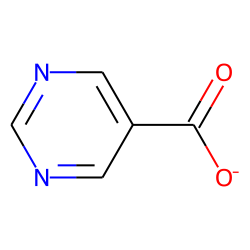

In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

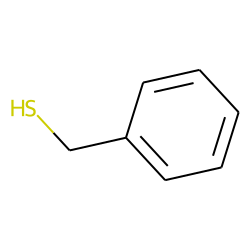

In [15]:
""" 
Annotating and drawing an example sulfur ligand 
"""
AromaticSulfurSmilesString = 'C1=C(C=CC=C1)CS[H]'
m_aromatic = Chem.MolFromSmiles(AromaticSulfurSmilesString)
m_aromatic



In [16]:
# Highlight a Substructure in a Molecule - Can we identify the benzene part and sulfur part?


ConvertedSmiles = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
ConvertedSmiles

ExampleMartiniString = "CC(=O)CO" # Example smiles string that is compatible with MARTINI 
ConvertedSmiles2 = Chem.MolToSmiles(Chem.MolFromSmiles(ExampleMartiniString))
ConvertedSmiles2
m2  = Chem.MolFromSmiles(ConvertedSmiles2)
#m2
# Hence, we need to create a dictionary that catalogues the string with the relevant martini bead 
SmilesToMartiniDictionary = {}
SmilesToMartiniDictionary["CC(=O)CO"] = 'P2' # P2 Bead 
SmilesToMartiniDictionary["CC(=O)O"] = 'SP2' # SP2 Bead 
SmilesToMartiniDictionary["CC(C)O"] = 'P1' # P1 Bead 
SmilesToMartiniDictionary["CC(C)O"] = 'P1' # P1 Bead 

In [50]:
"""
This part links the lignad coordinates with the 
"""
# new feature
u1 = mda.Universe.from_smiles("c1ncncc1C(=O)[O-]")
# new feature
Molecule = u1.select_atoms('all')
Molecule.positions # Finds 

# Need to label each of the xyz coordinates with the relevant indices within the 

array([[ 0.21974288, -1.0964268 ,  0.34153718],
       [ 1.5499225 , -1.0433767 ,  0.13456361],
       [ 2.183213  ,  0.05016092, -0.32715172],
       [ 1.4308215 ,  1.1342016 , -0.5888172 ],
       [ 0.08853919,  1.1297088 , -0.3966364 ],
       [-0.5610562 ,  0.00884084,  0.07668756],
       [-2.0129914 , -0.00967181,  0.2892181 ],
       [-2.7554169 ,  0.9485727 ,  0.0689394 ],
       [-2.5911837 , -1.1830964 ,  0.77022636],
       [-0.28229335, -1.9864845 ,  0.7154485 ],
       [ 3.257639  ,  0.04254253, -0.47718498],
       [-0.5269365 ,  2.0050287 , -0.6068304 ]], dtype=float32)

In [18]:
SmilesToMartiniDictionary

{'CC(=O)CO': 'P2', 'CC(=O)O': 'SP2', 'CC(C)O': 'P1'}

In [19]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('CC(=O)O')
print(m.GetSubstructMatches(substructure)) # Shows the indices of the molcule that matches the MARTINI bead 


((10, 8, 9, 7),)


In [20]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['3-Methylheptane', 'Aspirin', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2', 'Adamant',  'Propanoic acid']

for ids in identifiers :
    print(ids, CIRconvert(ids))


3-Methylheptane CCCCC(C)CC
Aspirin CC(=O)Oc1ccccc1C(O)=O
Diethylsulfate CCO[S](=O)(=O)OCC
Diethyl sulfate CCO[S](=O)(=O)OCC
50-78-2 CC(=O)Oc1ccccc1C(O)=O
Adamant Did not work
Propanoic acid CCC(O)=O


In [21]:
"""
In the above situation, we can identify the 3 parts - the thiolated part, the saturated hydrocarbon chain attached 
to the benzene group, and the benzene group itself. 
"""
substructure = Chem.MolFromSmarts('SC')
print(m.GetSubstructMatches(substructure))

()


In [22]:
ri = m.GetRingInfo().AtomRings()
for ring in ri:
    print(ring)
    

(0, 12, 11, 6, 2, 1)


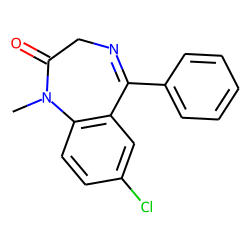

In [23]:
"""
Using 
"""

def GetRingSystems(mol, includeSpiro=False):
    """
    What is this function doing?
    """
    ri = mol.GetRingInfo() # Sets out the indices of the rings structures within the mol file 
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return systems
mol = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')
#print(GetRingSystems(mol))
mol

In [ ]:
def GetRingSystems(mol, includeSpiro = False):
    """
    """
    ri = mol.GetRingInfo()

In [87]:
import math


def fibonacci_sphere(samples=1):
    """
    Return a Fibanocci sphere with N number of points on the surface. 
    This will act as the template for the nanoparticle core. 
    """
    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points

In [89]:
Sphere = fibonacci_sphere(100)
Sphere = Sphere * 3

In [92]:
X = []
Y = []
Z = [] 
for entry in Sphere:
    X.append(entry[0])
    Y.append(entry[1])
    Z.append(entry[2])


In [91]:
X

[0.0,
 -0.14746625201921926,
 0.024599988672162225,
 0.20859696704755037,
 -0.38778989211836534,
 0.3695389676362656,
 -0.12388644490434449,
 -0.2362931120005442,
 0.5120055392429737,
 -0.5314613277182721,
 0.2554452834241677,
 0.18811168893216454,
 -0.5647642372728926,
 0.6597298249772894,
 -0.4008056847193861,
 -0.09215509016145575,
 0.5629320310676115,
 -0.753624771987667,
 0.5467833660637458,
 -0.036381294874350066,
 -0.5144986829326802,
 0.810318627523005,
 -0.6825268133340844,
 0.18538012732823733,
 0.4261332947445106,
 -0.8278154695967781,
 0.7989669998181965,
 -0.34387369489002784,
 -0.3048599924313488,
 0.8057105364694971,
 -0.8887773463851525,
 0.5016456981916779,
 0.1584380564140349,
 -0.7454066778203466,
 0.9464672217388467,
 -0.6492909240678544,
 0.004693348436698646,
 0.6501095730811276,
 -0.9684880955101909,
 0.7784324280224146,
 -0.17565640922420142,
 -0.524694425012087,
 0.9533026721538119,
 -0.8819824557590271,
 0.3454643719150054,
 0.3754813946348314,
 -0.90139411753

In [27]:
from numpy import pi, cos, sin, arccos, arange
import mpl_toolkits.mplot3d
import matplotlib.pyplot as pp

num_pts = 1000
indices = arange(0, num_pts, dtype=float) + 0.5

phi = arccos(1 - 2*indices/num_pts)
theta = pi * (1 + 5**0.5) * indices

x, y, z = cos(theta) * sin(phi), sin(theta) * sin(phi), cos(phi);

In [28]:
x

array([ 1.62018458e-02, -6.94123808e-02,  9.58943665e-02, -6.13224514e-02,
       -2.60350915e-02,  1.19220451e-01, -1.59780337e-01,  1.13904772e-01,
        3.79390125e-03, -1.33978357e-01,  2.03404589e-01, -1.66509816e-01,
        3.41745090e-02,  1.27877168e-01, -2.32115858e-01,  2.16853862e-01,
       -8.24343954e-02, -1.05050745e-01,  2.46404841e-01, -2.62105961e-01,
        1.37004838e-01,  6.81285844e-02, -2.46115143e-01,  2.99589428e-01,
       -1.94329311e-01, -1.95328293e-02,  2.31248365e-01, -3.26963636e-01,
        2.51052371e-01, -3.81857041e-02, -2.02213502e-01,  3.42323069e-01,
       -3.03999855e-01,  1.02271209e-01,  1.59911602e-01, -3.44267981e-01,
        3.50228180e-01, -1.69784680e-01, -1.05749407e-01,  3.31955177e-01,
       -3.87098277e-01,  2.37671112e-01,  4.16123222e-02, -3.05129346e-01,
        4.12354965e-01, -3.02849814e-01,  3.01906146e-02,  2.64134086e-01,
       -4.24201468e-01,  3.62315920e-01, -1.07002819e-01, -2.09902055e-01,
        4.21362731e-01, -

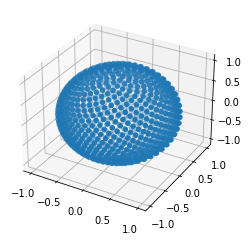

In [93]:
pp.figure().add_subplot(111, projection='3d').scatter(x, y, z);
pp.show()


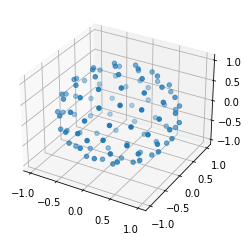

In [30]:
pp.figure().add_subplot(111, projection='3d').scatter(X, Y, Z);
pp.show()


In [31]:
from biopandas.pdb import PandasPdb

In [32]:
ppdb = PandasPdb().fetch_pdb('3eiy')

In [33]:
ppdb

In [34]:
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1.0,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1.0,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1.0,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1.0,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1.0,52.69,,,C,NaN,613


In [48]:
u = mda.Universe.from_smiles("Nc1cc(C[C@H]([O-])C=O)c[nH]1")
#mol = u.atoms.convert_to.rdkit()
#mol.RemoveAllConformers()
#for atom in mol.GetAtoms():
#    atom.SetProp("atomNote", str(atom.GetIdx()))
#mol
#u.positions
bb = u.select_atoms('all')
bb.positions

array([[ 3.5130105 ,  0.7228921 , -0.01457109],
       [ 2.2683268 ,  0.04198595,  0.04925309],
       [ 1.1309711 ,  0.5999384 ,  0.58533865],
       [ 0.13282233, -0.3556542 ,  0.47064218],
       [-1.2531828 , -0.17572765,  0.9214215 ],
       [-2.1354759 ,  0.40741408, -0.17204718],
       [-1.6202137 ,  1.6323073 , -0.53109324],
       [-3.511532  ,  0.4761106 ,  0.35876507],
       [-4.056504  , -0.5455693 ,  0.70330936],
       [ 0.71693003, -1.4357921 , -0.1259836 ],
       [ 2.0058072 , -1.1893704 , -0.37770912],
       [ 3.6123965 ,  1.6519574 , -0.46308097],
       [ 4.376456  ,  0.2928323 ,  0.39858386],
       [ 0.9885071 ,  1.5761458 ,  1.0194818 ],
       [-1.6746614 , -1.1560724 ,  1.2599269 ],
       [-1.2926594 ,  0.48665658,  1.8097904 ],
       [-2.0971105 , -0.2523841 , -1.0617344 ],
       [-4.03427   ,  1.4057119 ,  0.44470373],
       [ 0.22349006, -2.3689992 , -0.36925268],
       [ 2.706892  , -1.8143828 , -0.82198566]], dtype=float32)

In [35]:
import numpy as np
import plotly.graph_objs as go

def vector_plot(tvects,is_vect=True,orig=[0,0,0]):
    """Plot vectors using plotly"""

    if is_vect:
        if not hasattr(orig[0],"__iter__"):
            coords = [[orig,np.sum([orig,v],axis=0)] for v in tvects]
        else:
            coords = [[o,np.sum([o,v],axis=0)] for o,v in zip(orig,tvects)]
    else:
        coords = tvects

    data = []
    for i,c in enumerate(coords):
        X1, Y1, Z1 = zip(c[0])
        X2, Y2, Z2 = zip(c[1])
        vector = go.Scatter3d(x = [X1[0],X2[0]],
                              y = [Y1[0],Y2[0]],
                              z = [Z1[0],Z2[0]],
                              marker = dict(size = [0,5],
                                            color = ['blue'],
                                            line=dict(width=5,
                                                      color='DarkSlateGrey')),
                              name = 'Vector'+str(i+1))
        data.append(vector)

    layout = go.Layout(
             margin = dict(l = 4,
                           r = 4,
                           b = 4,
                           t = 4)
                  )
    fig = go.Figure(data=data,layout=layout)
    fig.show()

In [100]:
#X, Y, Z
SphereList = [] 
for i in range(0, len(X)):
    SphereList.append([X[i], Y[i], Z[i]])
    

In [97]:
SphereList = SphereList * 3

In [102]:
for i in range(0, len(SphereList) -1):
    SphereList[i][0] = SphereList[i][0] * 3
    SphereList[i][1] = SphereList[i][1] * 3
    SphereList[i][2] = SphereList[i][2] * 3

In [103]:
SphereList

[[0.0, 3.0, 0.0],
 [-0.44239875605765777, 2.9393939393939394, 0.4052734998649868],
 [0.07379996601648667, 2.878787878787879, -0.8409125483425437],
 [0.6257909011426511, 2.8181818181818183, 0.8162334149717771],
 [-1.163369676355096, 2.757575757575758, -0.20578371502119636],
 [1.1086169029087967, 2.6969696969696972, -0.7052113273424414],
 [-0.3716593347130335, 2.6363636363636362, 1.3825541999430508],
 [-0.7088793360016326, 2.5757575757575757, -1.364904025167096],
 [1.536016617728921, 2.515151515151515, 0.5609508052330836],
 [-1.5943839831548163, 2.454545454545454, 0.6581385308805665],
 [0.7663358502725032, 2.393939393939394, -1.6376151998354824],
 [0.5643350667964936, 2.3333333333333335, 1.799189119558962],
 [-1.6942927118186777, 2.2727272727272725, -0.981877258357563],
 [1.9791894749318681, 2.212121212121212, -0.4351192540008936],
 [-1.2024170541581582, 2.1515151515151514, 1.7103145268255049],
 [-0.27646527048436725, 2.090909090909091, -2.133463411397],
 [1.6887960932028343, 2.030303030

In [104]:
vector_plot(SphereList)

In [105]:
import numpy as np

def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

In [40]:
vec1 = [2, 3, 2.5]
vec2 = [-3, 1, -3.4]

mat = rotation_matrix_from_vectors(vec1, vec2)
vec1_rot = mat.dot(vec1)
assert np.allclose(vec1_rot/np.linalg.norm(vec1_rot), vec2/np.linalg.norm(vec2))

In [41]:
mat

array([[ 0.3278514 , -0.49076494, -0.80725661],
       [ 0.58913355, -0.56178145,  0.58079537],
       [-0.73853579, -0.66599653,  0.10494526]])

In [42]:
vec1_rot = mat.dot(vec1)


In [43]:
vec1_rot

array([-2.83473355,  0.94491118, -3.21269802])

In [106]:
Molecule.positions
Molecule.atoms.write("mol.pdb")

In [107]:
vector_plot()

TypeError: vector_plot() missing 1 required positional argument: 'tvects'

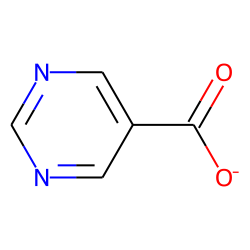

In [53]:
mol = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
#print(GetRingSystems(mol))
mol

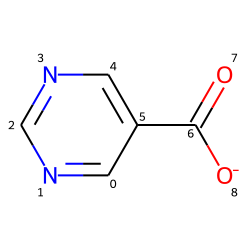

In [108]:
for atom in mol.GetAtoms():
    atom.SetProp("atomNote", str(atom.GetIdx()))
mol


In [109]:
Molecule.positions[5] - Molecule.positions[1]

array([-2.1109786 ,  1.0522175 , -0.05787605], dtype=float32)

In [110]:
AlignmentVector = (Molecule.positions[5] - Molecule.positions[1])

In [111]:
AlignmentVector

array([-2.1109786 ,  1.0522175 , -0.05787605], dtype=float32)

In [112]:
vec1 = SphereList[1]
vec2 = AlignmentVector

mat = rotation_matrix_from_vectors(vec1, vec2)
vec1_rot = mat.dot(vec1)
#assert np.allclose(vec1_rot/np.linalg.norm(vec1_rot), vec2/np.linalg.norm(vec2))

vec1_rot

array([-2.68413627,  1.33790794, -0.07359014])

In [113]:
vector_plot([vec2, vec1_rot])

In [114]:
TranslationVect = AlignmentVector / vec1_rot

In [115]:
TranslationVect

array([0.78646477, 0.78646479, 0.78646477])

In [116]:
Molecule.positions
for i in range(0, len(Molecule.positions)-1):
    Molecule.positions[i] = Molecule.positions[i] * TranslationVect

In [117]:
Molecule.positions

array([[ 0.21974288, -1.0964268 ,  0.34153718],
       [ 1.5499225 , -1.0433767 ,  0.13456361],
       [ 2.183213  ,  0.05016092, -0.32715172],
       [ 1.4308215 ,  1.1342016 , -0.5888172 ],
       [ 0.08853919,  1.1297088 , -0.3966364 ],
       [-0.5610562 ,  0.00884084,  0.07668756],
       [-2.0129914 , -0.00967181,  0.2892181 ],
       [-2.7554169 ,  0.9485727 ,  0.0689394 ],
       [-2.5911837 , -1.1830964 ,  0.77022636],
       [-0.28229335, -1.9864845 ,  0.7154485 ],
       [ 3.257639  ,  0.04254253, -0.47718498],
       [-0.5269365 ,  2.0050287 , -0.6068304 ]], dtype=float32)

In [118]:
D = []
for i in SphereList:
    D.append(i)
for i in Molecule.positions:
    D.append(i)
vector_plot(D)